In [1]:
# Step 1: Import and Clean Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("bank-additional-full.csv", sep = ";")

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [8]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

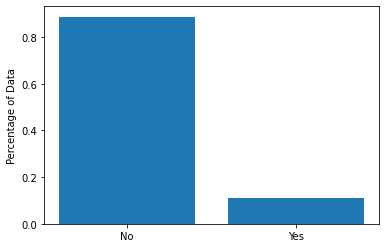

In [10]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [11]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
ros = RandomOverSampler(random_state=100)
X_scaled, y_train = ros.fit_resample(X_scaled, y_train)
X_test, y_test = ros.fit_resample(X_test, y_test)

In [14]:
# Step 2: Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [15]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.028\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.474\ngini = 0.379\nsamples = 24238\nvalue = [18084, 6154]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.208\nsamples = 11684\nvalue = [10308, 1376]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.183\nsamples = 11370\nvalue = [10213, 1157]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.422\nsamples = 314\nvalue = [95, 219]\nclass = Yes'),
 Text(0.375, 0.375, 'month_may <= 0.36\ngini = 0.471\nsamples = 12554\nvalue = [7776, 4778]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 9241\nvalue = [4855, 4386]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.209\nsamples = 3313\nvalue = [2921, 392]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 1.029\ngini = 0.402\nsamples = 26922\nvalue = [7496, 19426]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.283\ngini = 0.481\nsamples = 14360\nvalue = [5765, 8595]\nclass = Ye

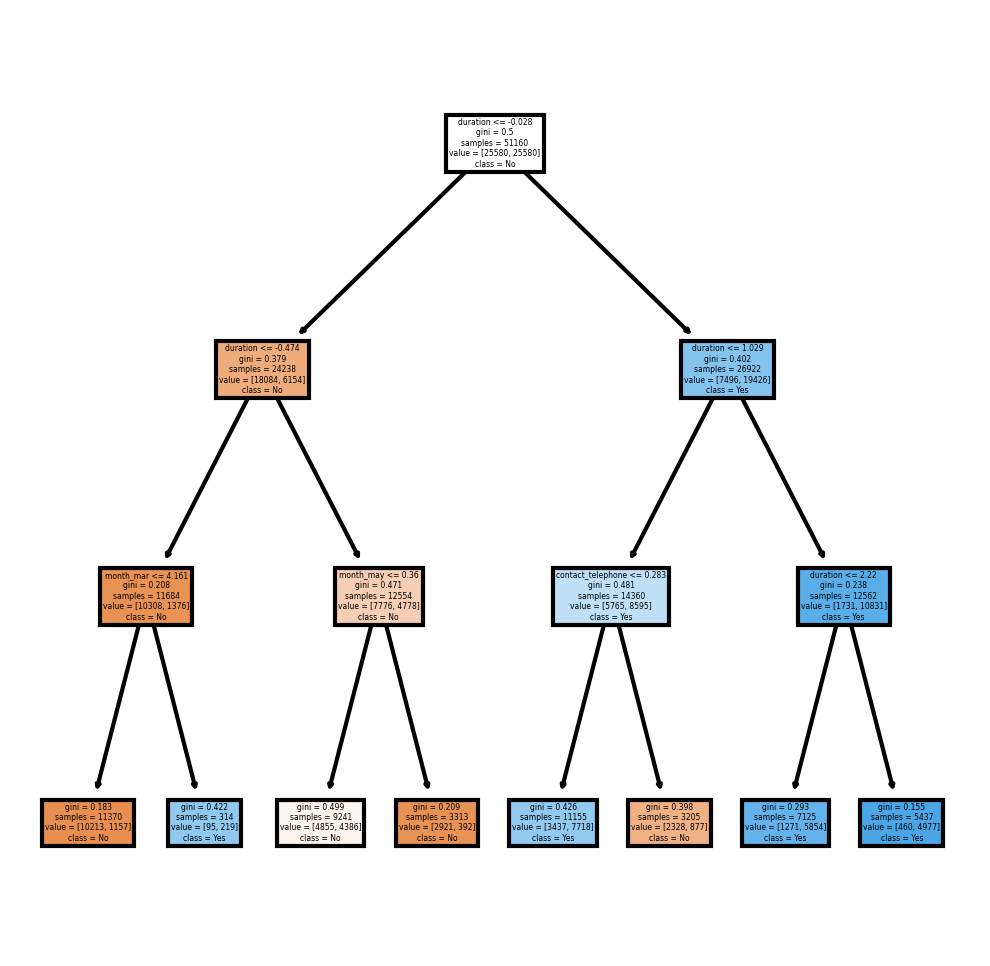

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])

In [17]:
# Step 3: Confusion matrix on out of sample data. Visualize and store as variable

In [18]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

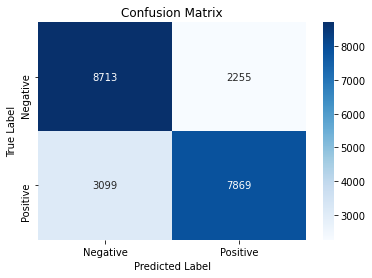

In [19]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
# Step 4: Use bagging on your descision tree 

In [25]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(base_estimator=dtree, 
                n_estimators=100, 
                max_samples=0.5, 
                max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7779449307075128


In [26]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

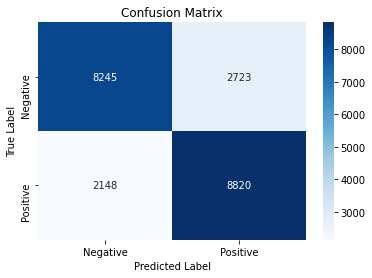

In [27]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
# Step 5: Boost your tree

In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

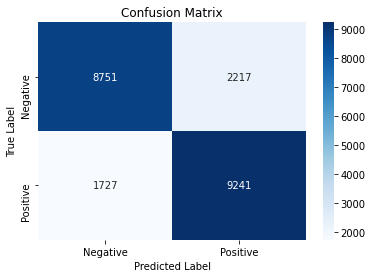

In [32]:
class_labels = ['Negative', 'Positive']

sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
# Step 6: Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from mlens.ensemble import SuperLearner

In [38]:
base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(5)
]

super_learner = SuperLearner(folds = 10, random_state=42)
super_learner.add(base_estimators)

super_learner.fit(X_scaled, y_train)

base_predictions = super_learner.predict(X_scaled)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(xtemp, ytemp)
/opt/anaconda3/lib/python3.8/site-packages/mlens/parallel/learner.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

In [40]:
log_reg = LogisticRegression(fit_intercept=False).fit(base_predictions, y_train)
log_reg.coef_

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-3.68837894, -4.18034592, -3.04677979, 17.92808774]])

In [41]:
y_pred = log_reg.predict(super_learner.predict(X_test))

In [42]:
cm_superlearner = confusion_matrix(y_test, y_pred)

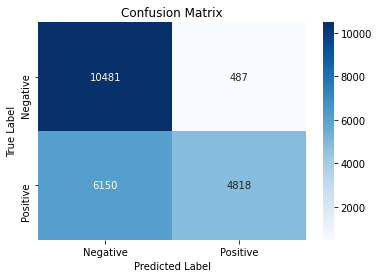

In [43]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_superlearner, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
# Step 6: Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [45]:
sen = []
cm_list = [cm_raw, cm_bag, cm_boost, cm_superlearner]
for cm in cm_list:
  tn, fp, fn, tp = cm.ravel()
  sen.append(tp/(tp+fn))

In [46]:
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
sensitivity = sen

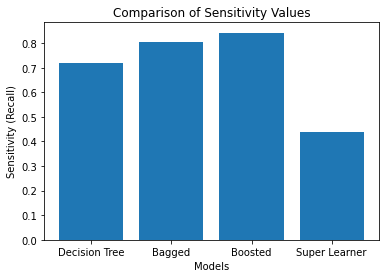

In [48]:
plt.bar(models,sensitivity)
plt.xlabel("Models")
plt.ylabel("Sensitivity (Recall)")
plt.title("Comparison of Sensitivity Values")
plt.show()